https://github.com/sn3fru/mensa_quadrant

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv('dados_turma_03.csv', delimiter=';')
df.set_index('Nome',inplace=True)
df.drop(['Extremismo'], axis=1, inplace=True)

dfn = normalize(df, norm='l2', axis=1, copy=True, return_norm=False)
pca = PCA(n_components=2, svd_solver='full')
pca.fit(dfn)
dft = pca.transform(dfn)
final = pd.merge(pd.DataFrame(dft),df.reset_index(),how='inner',left_index=True,right_index=True)
final.rename(columns={0:'cp1',1:'cp2'},inplace=True)

In [36]:
final.corr().round(3)

,index,cp1,cp2,Eixo Economico,Eixo Diplomático,Eixo Civil,Eixo Social
index,1.000,0.256,0.062,-0.291,0.252,-0.234,0.245
cp1,0.256,1.000,0.000,-0.803,0.939,-0.865,0.879
cp2,0.062,0.000,1.000,-0.458,0.045,0.133,-0.155
Eixo Economico,-0.291,-0.803,-0.458,1.000,-0.661,0.789,-0.550
Eixo Diplomático,0.252,0.939,0.045,-0.661,1.000,-0.693,0.885
Eixo Civil,-0.234,-0.865,0.133,0.789,-0.693,1.000,-0.592
Eixo Social,0.245,0.879,-0.155,-0.550,0.885,-0.592,1.000


In [11]:
final.reset_index(inplace=True)
dist = lambda p1, p2: sqrt(((p1-p2)**2).sum())
dm = np.asarray([[dist(p1, p2) for p2 in final[['cp1','cp2']].values] for p1 in final[['cp1','cp2']].values])
distance_matrix = pd.merge(pd.DataFrame(dm),final[['Nome']], how='inner',left_index=True,right_index=True)
distance_matrix.set_index('Nome', inplace=True)
distance_matrix.columns = list(final['Nome'])
distance_matrix.to_excel('distance_matrix.xlsx')

In [28]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(final[['cp1','cp2']])

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = final['cp1'].min() - 1, final['cp1'].max() + 1
y_min, y_max = final['cp2'].min() - 1, final['cp2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

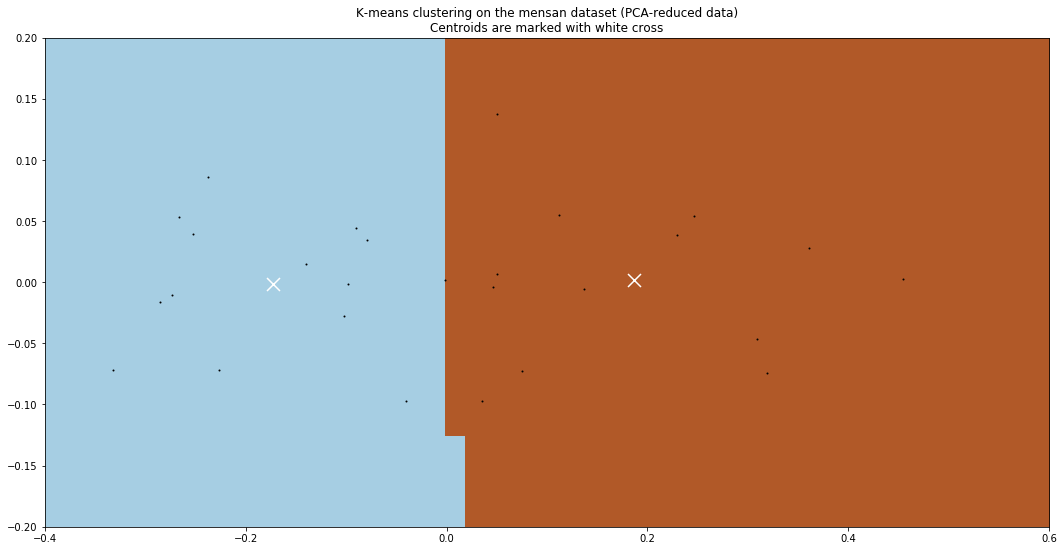

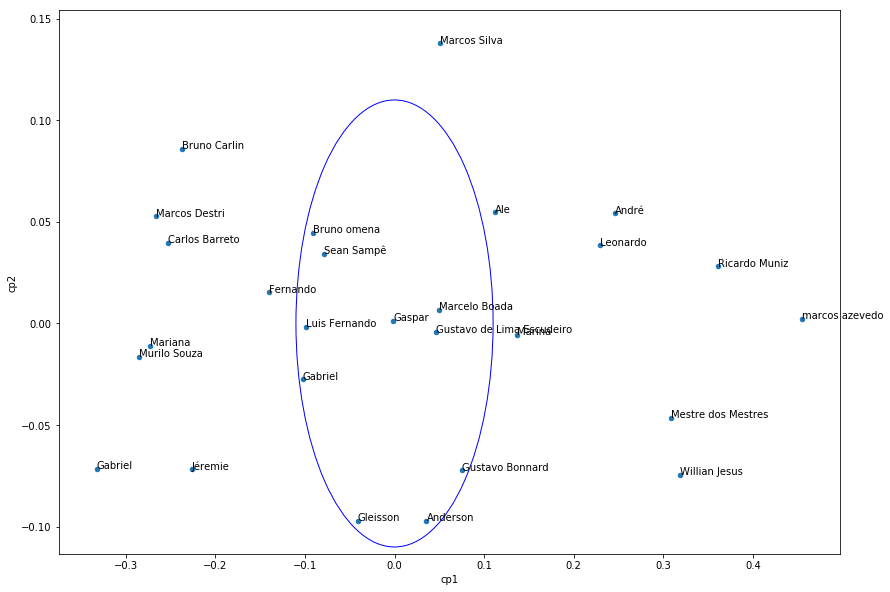

In [29]:
plt.figure(1).set_size_inches(18, 9)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(final['cp1'], final['cp2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means clustering on the mensan dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')

plt.xlim(-0.4,0.6)
plt.ylim(-0.2,0.2)

fig, ax = plt.subplots()

fig.set_size_inches(14, 10)

circle = plt.Circle((0, 0), .11, color='b', fill=False)
ax.add_artist(circle)

final.plot('cp1', 'cp2', kind='scatter', ax=ax)

for k, v in final.set_index('Nome')[['cp1','cp2']].iterrows():
    ax.annotate(k, v)